# Trying Different Configurations for REINFORCE

In this notebook, we will try out different configurations and plot the performance of the agent vs those configurations.

In [1]:
# import needed libs

%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import matplotlib.pyplot as plt

import datetime

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

In [2]:
# Some initializations

from envs import SmartVac
from agents import ReinforceAgent

max_episode_steps = 100
results_folder = 'res/'
figs_folder = 'figs/'

In [7]:
alpha_base = 2
alpha_pows = np.linspace(-8, -1, 8)
alphas = np.power(alpha_base, alpha_pows)

AgentClass = ReinforceAgent

best_performance = 0.63
env = SmartVac()
num_of_tests = 5
episode_count = 10000
plot_count = int(episode_count / 100)

agent_name = AgentClass.__name__

all_avg_plots = []
all_avgs = []
all_bests = []
all_lasts = []
for alpha_pow in alpha_pows:
    alpha = np.power(alpha_base, alpha_pow)
    params_str = f'alpha={alpha_base}^{alpha_pow:.2f}_episodes_{episode_count}'    
    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha=alpha)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    avgs = np.mean(np.array(mult_avgs), axis=0)
    probs1 = np.mean(np.array(mult_probs1), axis=0)
    probs2 = np.mean(np.array(mult_probs2), axis=0)
    
    all_avgs.append(np.mean(avgs))
    all_bests.append(np.max(avgs))
    all_lasts.append(avgs[-1])
    all_avg_plots.append(avgs)
    
    results = f'\n\nAgent: {agent_name} \tAlpha: {alpha}'
    results += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################

Agent: ReinforceAgent 	Alpha: 0.00390625
Average: 		0.158
Best 100 Average: 	0.555
Last 100 Average: 	0.541

1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 #######################################################################

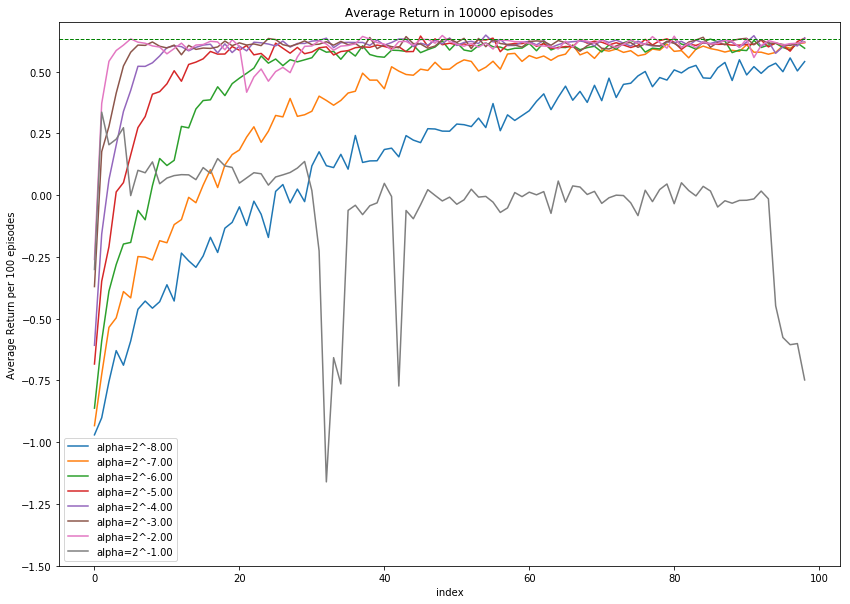

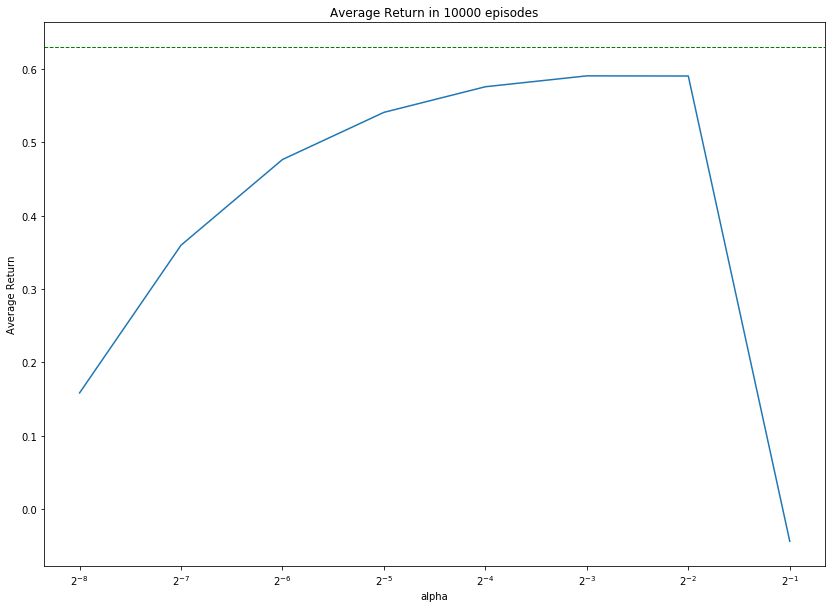

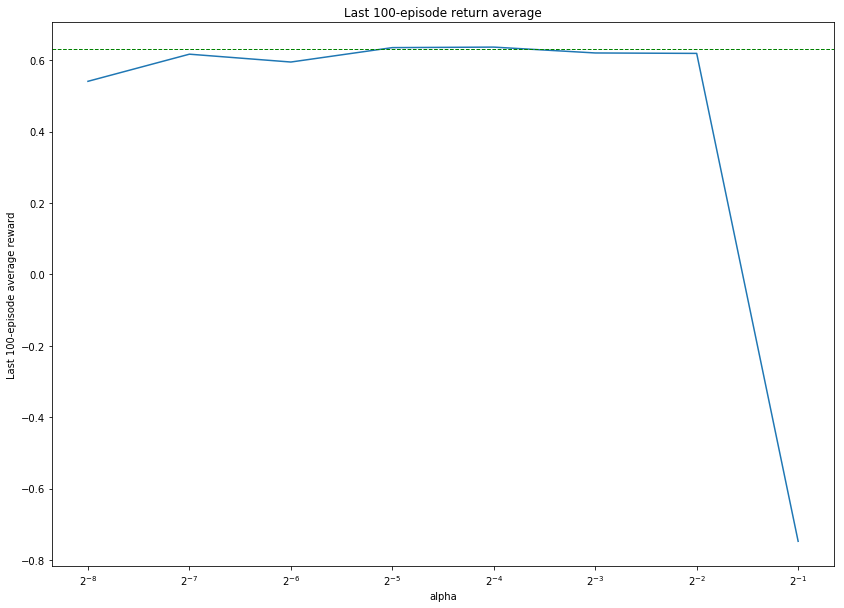

In [8]:
plt.figure(1, figsize=(14,10))
plt.plot(np.array(all_avg_plots).T)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Average Return per {plot_count} episodes')
plt.legend([f'alpha={alpha_base}^{alpha_pow:.2f}' for alpha_pow in alpha_pows])
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
plt.ylim(best_performance-2.13,best_performance+.07)
# plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}.png')

plt.figure(2, figsize=(14,10))
plt.semilogx(alphas, all_avgs, basex=alpha_base)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel('alpha')
plt.ylabel('Average Return')
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# plt.ylim(best_performance-2.13,best_performance+.07)
# plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}_avg.png')

# There is no meaning in bests plot
# plt.figure(3, figsize=(14,10))
# plt.semilogx(alphas, all_bests, basex=alpha_base)
# plt.title(f'Best {plot_count}-episode return average until {episode_count} episodes')
# plt.xlabel('alpha')
# plt.ylabel(f'Best {plot_count}-episode average reward')
# plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# # plt.ylim(best_performance-2.13,best_performance+.07)
# # plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}_best.png')

plt.figure(4, figsize=(14,10))
plt.semilogx(alphas, all_lasts, basex=alpha_base)
plt.title(f'Last {plot_count}-episode return average')
plt.xlabel('alpha')
plt.ylabel(f'Last {plot_count}-episode average reward')
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# plt.ylim(best_performance-2.13,best_performance+.07)
# plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}_last.png')

plt.show()

# Reinforce Configs with other rewards

In [5]:
alpha_base = 2
alpha_pows = np.linspace(-6, 1, 8)
alphas = np.power(alpha_base, alpha_pows)

AgentClass = ReinforceAgent

best_performance = -1.37
env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 1
episode_count = 10000
plot_count = int(episode_count / 100)

agent_name = AgentClass.__name__

all_avg_plots = []
all_avgs = []
all_bests = []
all_lasts = []
for alpha_pow in alpha_pows:
    alpha = np.power(alpha_base, alpha_pow)
    params_str = f'alpha={alpha_base}^{alpha_pow:.2f}_episodes_{episode_count}'    
    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha=alpha)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    avgs = np.mean(np.array(mult_avgs), axis=0)
    probs1 = np.mean(np.array(mult_probs1), axis=0)
    probs2 = np.mean(np.array(mult_probs2), axis=0)
    
    all_avgs.append(np.mean(avgs))
    all_bests.append(np.max(avgs))
    all_lasts.append(avgs[-1])
    all_avg_plots.append(avgs)
    
    results = f'\n\nAgent: {agent_name} \tAlpha: {alpha}'
    results += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results)


1 ###################################################################################################

Agent: ReinforceAgent 	Alpha: 0.015625
Average: 			-2.430
Best 100 Average: 	-2.199
Last 100 Average: 	-2.372

1 ###################################################################################################

Agent: ReinforceAgent 	Alpha: 0.03125
Average: 			-2.426
Best 100 Average: 	-2.135
Last 100 Average: 	-2.328

1 ###################################################################################################

Agent: ReinforceAgent 	Alpha: 0.0625
Average: 			-2.419
Best 100 Average: 	-2.149
Last 100 Average: 	-2.465

1 ###################################################################################################

Agent: ReinforceAgent 	Alpha: 0.125
Average: 			-2.435
Best 100 Average: 	-2.142
Last 100 Average: 	-2.347

1 ###################################################################################################

Agent: ReinforceAgent 	Alpha: 0.25
Average: 		

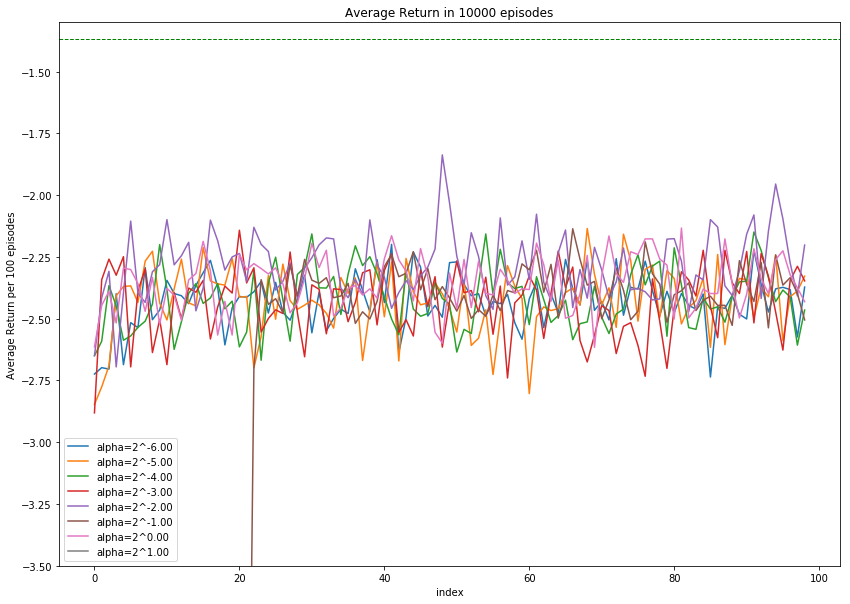

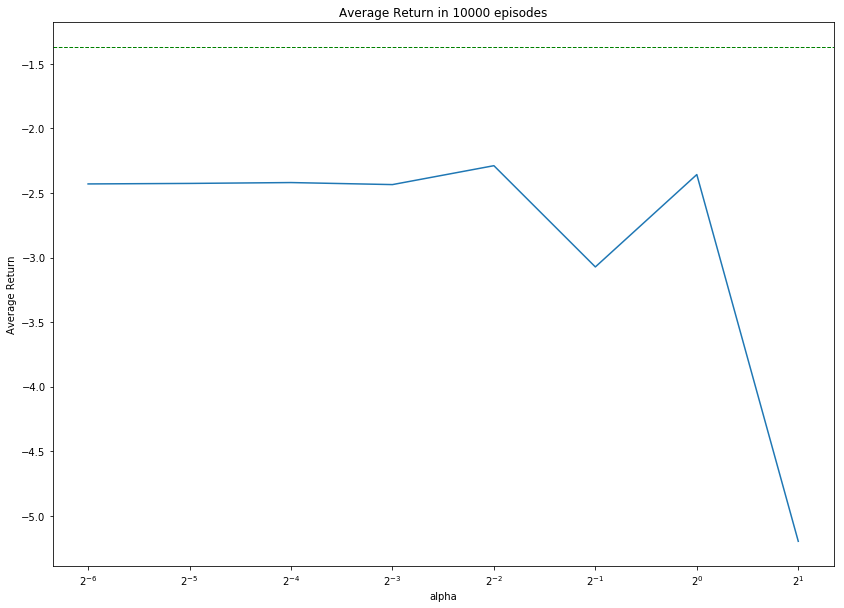

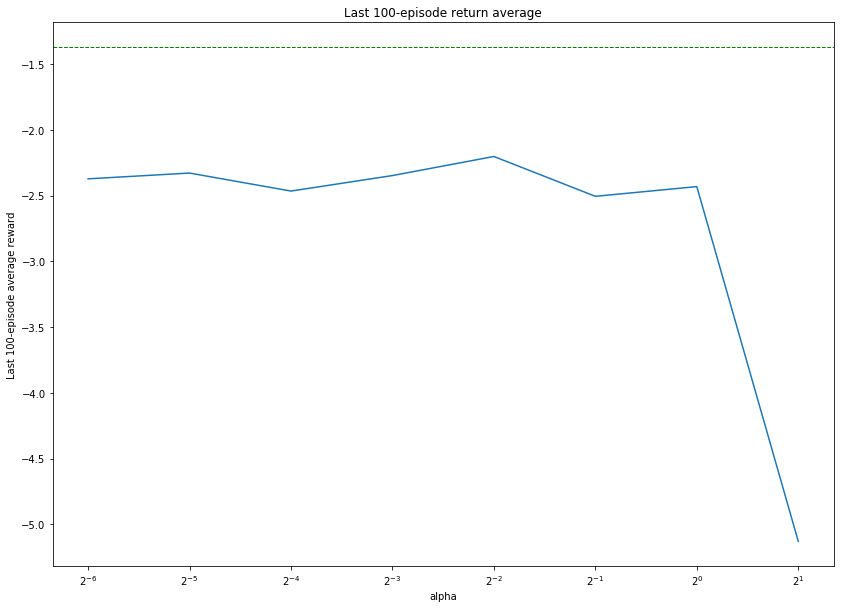

In [6]:
plt.figure(1, figsize=(14,10))
plt.plot(np.array(all_avg_plots).T)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Average Return per {plot_count} episodes')
plt.legend([f'alpha={alpha_base}^{alpha_pow:.2f}' for alpha_pow in alpha_pows])
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
plt.ylim(best_performance-2.13,best_performance+.07)
# plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}.png')

plt.figure(2, figsize=(14,10))
plt.semilogx(alphas, all_avgs, basex=alpha_base)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel('alpha')
plt.ylabel('Average Return')
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# plt.ylim(best_performance-2.13,best_performance+.07)
# plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}_avg.png')

# There is no meaning in bests plot
# plt.figure(3, figsize=(14,10))
# plt.semilogx(alphas, all_bests, basex=alpha_base)
# plt.title(f'Best {plot_count}-episode return average until {episode_count} episodes')
# plt.xlabel('alpha')
# plt.ylabel(f'Best {plot_count}-episode average reward')
# plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# # plt.ylim(best_performance-2.13,best_performance+.07)
# # plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}_best.png')

plt.figure(4, figsize=(14,10))
plt.semilogx(alphas, all_lasts, basex=alpha_base)
plt.title(f'Last {plot_count}-episode return average')
plt.xlabel('alpha')
plt.ylabel(f'Last {plot_count}-episode average reward')
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# plt.ylim(best_performance-2.13,best_performance+.07)
# plt.savefig(f'{figs_folder}agent_{agent_name}_episodes_{episode_count}_last.png')

plt.show()